In [3]:
import IPython.display as ipd
import soundfile as sf
tmp="/home/badrdr/Dev/AudioDNN/VGGTraining/genres/blues/blues.00010.au"
x, fs = sf.read(tmp)
print(x.shape)
print(fs)
x=x[:int(x.shape[0]*0.1)]

(661794,)
22050


In [4]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
t, f,Zxx = signal.stft(x, fs=fs, nperseg=512)
phase=np.angle(Zxx)

print(np.max(abs(Zxx)))
print(np.mean(abs(Zxx)))

#module=20*np.log(abs(Zxx)+1e-5)
module=(abs(Zxx)**2)*2500
module2=module[:,:]
module=module[:128,:]
print(np.max(abs(module)))
print(np.mean(abs(module)))

result=np.stack([module,module,module], axis=-1)
print(result.shape)
plt.imshow(result[:,:,0])


0.16479229071447712
0.003033171908453359
67.89124769731185
0.5622998351464297
(128, 260, 3)


In [5]:
n,l=module2.shape
module2=np.sqrt(module2/2500)
for i in range(128,n):
    for j in range(l):
        module2[i,j]=module2[i,j]
x2=module2*(np.cos(phase)+np.sin(phase)*1j)
t,x=signal.istft(x2,fs=fs,nperseg=512)
sf.write("blues10_reverse.ogg",x,fs)
ipd.Audio(x, rate=fs)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


50.53613613105386
0.5500790573639162
(128, 259, 3)


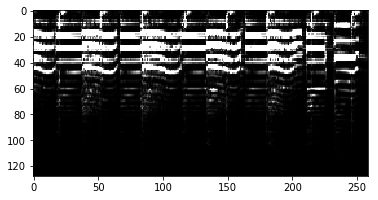

In [12]:
import librosa
S=librosa.feature.melspectrogram(y=x,sr=fs, n_fft=512,hop_length=512//2)
result2=np.stack([S,S,S],axis=-1)
print(np.max(abs(S)))
print(np.mean(abs(S)))
print(result2.shape)
plt.imshow(result2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.16479229071447712
0.0030331719084533593
230.2584378912799
167.19097573401135
result (257, 260, 3)


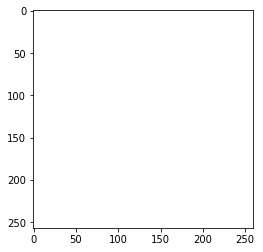

In [17]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
t, f,Zxx = signal.stft(x, fs=fs, nperseg=512)
print(np.max(abs(Zxx)))
print(np.mean(abs(Zxx)))

module=abs(20*np.log(abs(Zxx)+1e-5))
#module=(abs(Zxx)**2)*2500
#module=module[:128,:]
print(np.max(abs(module)))
print(np.mean(abs(module)))

result=np.stack([module,module,module], axis=-1)
print("result",result.shape)
plt.imshow(result)

In [6]:
from tensorflow.python.lib.io import file_io

In [5]:
import tensorflow-gpu


SyntaxError: invalid syntax (<ipython-input-5-9405d16d83c1>, line 1)